In [1]:
processed = "/home/xps/educate/code/hust/DS_20222/data-science-e10/data/processed"

In [37]:
from glob import glob
from matplotlib import pyplot as plt
import seaborn as sns

In [52]:
topic = "politics"
lines = [open(file, 'r').readlines() if open(file, 'r').readlines() != [] else [''] for file in glob(processed + f"/{topic}/*.txt")]
lengths = [len(line[0]) for line in lines]

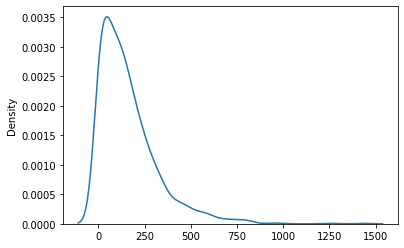

In [53]:
fig, ax1 = plt.subplots()
sns.kdeplot(lengths)
plt.show()